<a href="https://colab.research.google.com/github/darialrsm/Machine-learning/blob/main/%D0%A5%D0%B0%D1%85%D0%BB%D1%94%D0%B2%D0%B0_%D0%BF%D1%80_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Автор: Хахлєва Дар'я, ФІТ 4-11

Інсталювання енкодерів та необхідних бібліотек

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore

import category_encoders as ce

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

1. Завантаження датасету

In [4]:
import kagglehub
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'car-price-prediction' dataset.
Path to dataset files: /kaggle/input/car-price-prediction


In [5]:
df = pd.read_csv(os.path.join(path, "CarPrice_Assignment.csv"))
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Загальна інформація про датасет

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

2. Перевірити дублікати та пропущені дані

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


Опис датасету

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


3. Перевірка симетричності розподілів

In [10]:
df.skew(numeric_only=True)

,0
car_ID,0.000000
symboling,0.211072
wheelbase,1.050214
carlength,0.155954
carwidth,0.904003
carheight,0.063123
curbweight,0.681398
enginesize,1.947655
boreratio,0.020156
stroke,-0.689705


Деякі ознаки мають skew, що перевищує 1, це свідчить про їх асиметричний розподіл. А саме:
1. wheelbase: 1.05021  
2. enginesize:	1.947655  
3. compressionratio:	2.610862  
4. horsepower:	1.405310  
5. price:	1.777678

Дані стовпці мають правосторонню (позитивну) асиметрію

4. Дослідження викидів, видалення аномальних значень

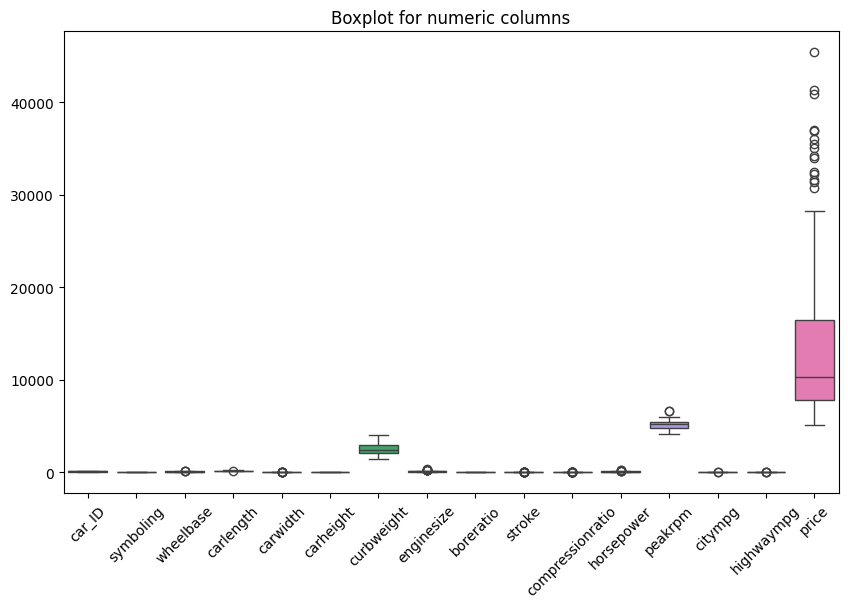

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot for numeric columns")
plt.show()

Можемо побачити, що найбільш вираженими викиди є у стовпця price, менші (але також помітні) - у curbweight, peakrpm. Ще менш виражені - у horsepower, enginesize, compressionratio, citympg	та highwaympg. Поодиноки або зовсім відсутні - car_ID, symboling, carlength, carheight, boreratio.

Видалення викидів

In [12]:
# Обчислюємо Z-оцінки для всіх числових стовпців
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))

# Створюємо маску: True для всіх рядків, де Z-score < 3 у всіх стовпцях
mask = (abs(z_scores) < 3).all(axis=1)

# Фільтруємо датафрейм
df = df[mask].copy()

print(f"Було рядків: {len(df)}, після видалення викидів: {len(df)}")

Було рядків: 181, після видалення викидів: 181


In [13]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


5. Дослідити кореляцію, видалити корельовані ознаки (>0.85)

Побудова матриці попарної кореляції ознак

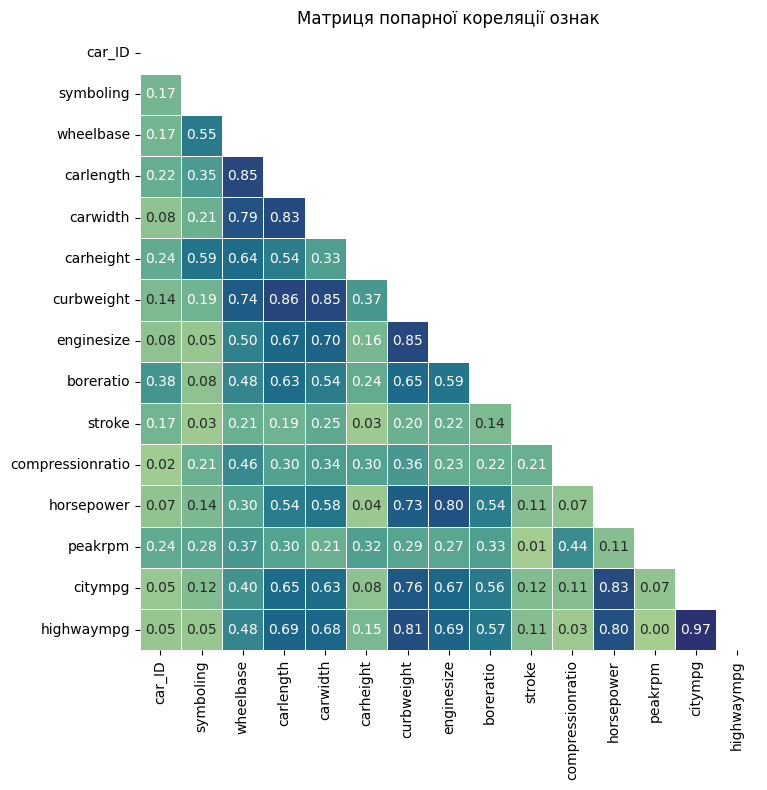

In [14]:
mtx = df.drop('price', axis=1).corr(numeric_only=True).abs()

# Побудова графіка
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    mtx,
    cmap='crest',
    annot=True,
    fmt=".2f",
    linewidths=.5,
    mask=np.triu(np.ones_like(mtx, dtype=bool)),  # маскуємо верхню трикутну частину
    square=True,
    cbar=False,
    ax=ax
)

plt.title("Матриця попарної кореляції ознак")
plt.tight_layout()
plt.show()

Видно щільну мультиколінеарність у кількох групах ознак (див. великі коефіцієнти на heatmap):  
citympg – highwaympg: 0.97 → залишити одну (звично citympg), highwaympg видалити.  
Розмір/маса: wheelbase – carlength (0.85), carlength – carwidth (0.83), carlength – curbweight (0.86), carwidth – curbweight (0.85)


6. Зробити розподіл симетричним

Кореляційні ознаки:

In [15]:
corr_price = df.corr(numeric_only=True)['price'].abs().sort_values(ascending=False)
corr_price

,price
price,1.000000
enginesize,0.830473
curbweight,0.802365
horsepower,0.792024
carwidth,0.711771
highwaympg,0.708831
citympg,0.702379
carlength,0.638258
boreratio,0.536939
wheelbase,0.499827


In [16]:
to_drop = {'highwaympg', 'wheelbase', 'carlength', 'enginesize'}

present = list(to_drop & set(df.columns))
df1 = df.drop(columns=present).copy()

print("Видалено:", present)
print("Кількість ознак до/після:", df.shape[1], "→", df1.shape[1])

Видалено: ['carlength', 'wheelbase', 'highwaympg', 'enginesize']
Кількість ознак до/після: 26 → 22


Огляд категоріальних ознак

In [17]:
df1.select_dtypes(include='object').nunique()

,0
CarName,131
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
enginetype,6
cylindernumber,5
fuelsystem,8


In [18]:
# Розділяємо ознаки та цільову змінну
X = df1.drop('price', axis=1)
y = df1['price']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

7. Кодування категоріальних ознак

Для кодування категоріальних ознак використовуємо пакет categorical_encoders, з бібліотеки sklearn. Спочатку відбираємо категоріальні ознаки, а потім навчаємо наш екземпляр об’єкта TargetEncoder(енкодер) та використовуємо його для трансформації категоріальних ознак у тренувальному та тестовому наборах даних.

In [19]:
cat_cols = X_train.select_dtypes(include='object').columns
cat_cols

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [20]:
encoder = ce.TargetEncoder(cols=cat_cols)

8. Розділення датасету на тренувальні та тестові дані

In [21]:
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

Нормалізація змінних

In [22]:
power_transform = PowerTransformer().set_output(transform='pandas')

X_train = power_transform.fit_transform(X_train)
X_test = power_transform.transform(X_test)

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Асиметрія розподілу початкових числових ознак у наборі даних зменшилась і наблизилась до 0, що означає, що їх розподіли тепер більше нагадують нормальні.

In [23]:
X_train.skew()

,0
car_ID,-0.282277
symboling,-0.067462
CarName,0.000000
fueltype,0.000000
aspiration,0.000000
doornumber,-0.312449
carbody,-0.194207
drivewheel,0.494597
enginelocation,0.000000
carwidth,0.000000


9. Побудова моделей:   
1) Лінійна регресія  
2) Ridge    
3) Лассо  
4) Випадковий ліс  
5) Градієнтний бустинг
6) Метод опорних векторів (SVR)

In [24]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR()
}

print("Побудовані моделі:", ", ".join(models.keys()))

Побудовані моделі: LinearRegression, Ridge, Lasso, RandomForestRegressor, GradientBoostingRegressor, SVR


10. Виведення метрик моделей

In [25]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = model.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "R²": r2,
        "MAE": mae,
        "MSE": mse
    }

    print(f"[{name}] R²: {r2:.3f} | MAE: {mae:.3f} | MSE: {mse:.3f}")

[LinearRegression] R²: 0.767 | MAE: 2380.987 | MSE: 12064453.830
[Ridge] R²: 0.767 | MAE: 2350.975 | MSE: 11902832.143
[Lasso] R²: 0.767 | MAE: 2379.670 | MSE: 12058368.761
[RandomForestRegressor] R²: 0.994 | MAE: 3837.538 | MSE: 29216380.123
[GradientBoostingRegressor] R²: 0.998 | MAE: 2950.046 | MSE: 22163254.734
[SVR] R²: -0.125 | MAE: 4871.353 | MSE: 52888074.443


11. Яку модель не можна побудувати для даної задачі?

Виведені вище метрики свідчтать про те, що метод опорних веткторів підходить найменше для прогнозування у даному випадку. Перш за все, можна побачити, що коефіцієнт детермінації дорівнює від'ємному значенню (-0.125) Тобто SVR не відтворює закономірності в даних, та є менш ефективним варіантом за просте прогнозування за допомогою середнього значення. Так само й за іншими метриками дана модель має гірші результати, ніж інші.

12. Виведення графіків для справжніх та прогнозованих даних

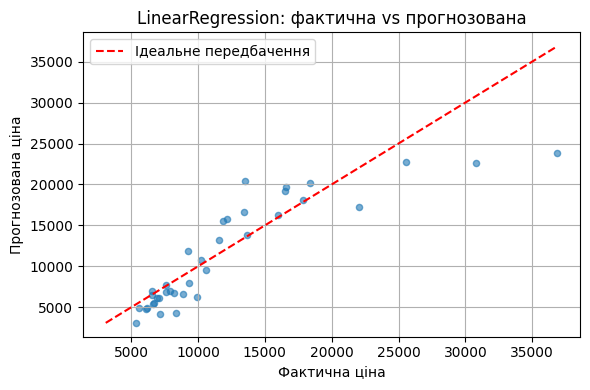

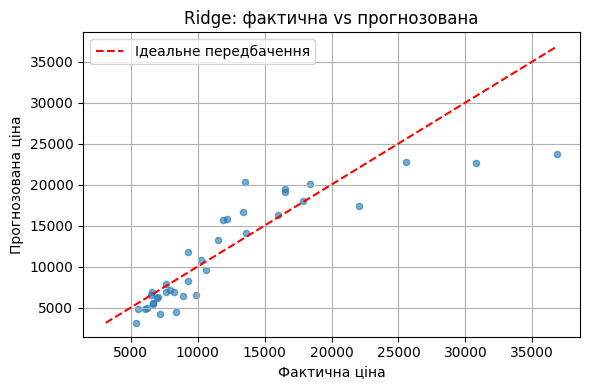

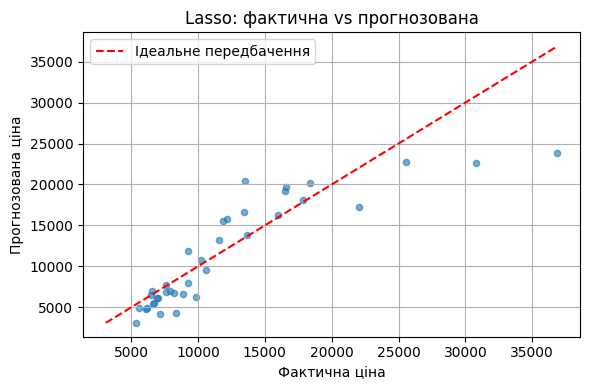

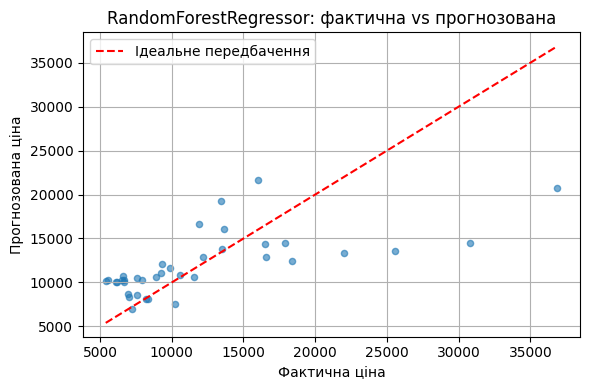

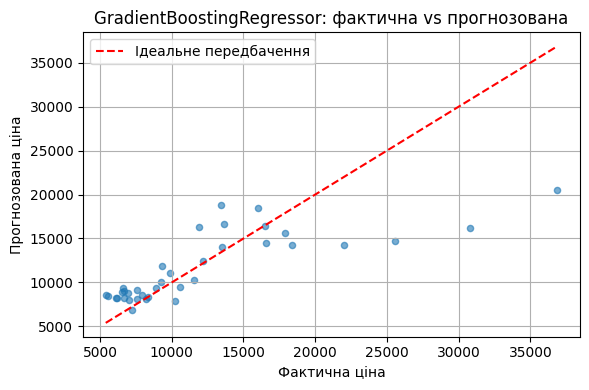

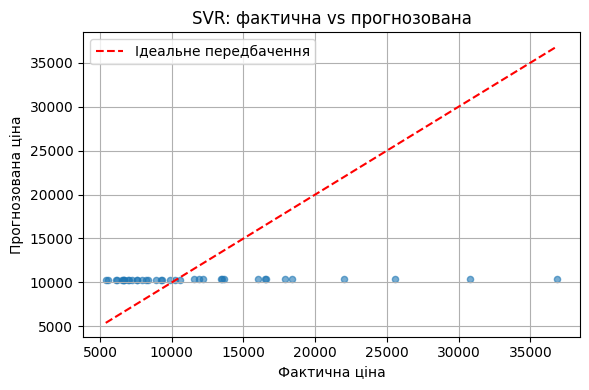

In [26]:
y_true = np.asarray(y_test)
for name, res in results.items():
    y_pred = np.asarray(res["y_pred"]).ravel()
    lo = min(y_true.min(), y_pred.min())
    hi = max(y_true.max(), y_pred.max())

    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred, s=20, alpha=0.6)
    plt.plot([lo, hi], [lo, hi], 'r--', label='Ідеальне передбачення')
    plt.xlabel("Фактична ціна")
    plt.ylabel("Прогнозована ціна")
    plt.title(f"{name}: фактична vs прогнозована")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

13. Прогноз ціни за допомогою моделі Випадковий ліс для 10 рандомних значень ID

In [27]:
rf_key = 'RandomForestRegressor' if 'RandomForestRegressor' in results else 'RandomForest'
y_rf = np.asarray(results[rf_key]["y_pred"]).ravel()

# Колонка ідентифікатора: беремо 'car_ID', якщо є, інакше — індекс тесту
if 'car_ID' in X_test.columns:
    id_name = 'car_ID'
    id_series = X_test['car_ID']
else:
    id_name = 'row_id'
    id_series = pd.Series(y_test.index, index=y_test.index)

df_rf = pd.DataFrame({
    id_name: id_series,
    'Actual': y_test,
    'Predicted_RF': y_rf
})
sample_rf = df_rf.sample(n=min(10, len(df_rf)), random_state=42).reset_index(drop=True)
print(sample_rf.to_string(index=False))

   car_ID    Actual  Predicted_RF
 0.670829  7053.000      8297.340
 0.913192  6938.000      8698.675
 0.983051  8358.000      8134.890
 1.456411 15985.000     21675.270
-1.149755  5399.000     10219.410
 1.443233 13415.000     19245.910
-1.283055  7609.000     10465.170
-0.471268 25552.000     13537.120
-1.718497 17859.167     14494.650
-0.652360 13645.000     16119.480


14. Висновки

У дані лабораторній роботі було проведено глибоке дослідження датасету CarPrice_Assignment, побудовано регресійні моделі, графіки розподілу справжніх та прогнозованих даних. Також було проаналізвано метрики отриманих моделей, визначено неефективну для даної задачі (SVR) та зроблено прогноз однієї з ознак датасету (ціни) за допомогою моделі Випадковий ліс.